***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as spy

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [97]:
dados = pd.read_csv('C:\DSC\Curso-dsc\Estatistica\Curso de Estatística\dados.csv')

### Visualize o conteúdo do DataFrame

In [98]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [99]:
#primeiro eu descubro o min() e o máximo
dados['Renda'].min()

0

In [100]:
dados['Renda'].max()

200000

In [101]:
#agora eu vou usar os dados acima para separar as classes
#repare que agora eu usei o min e o máximo que descobri acima
classes = [
    dados.Renda.min(),
    2*788,
    5*788,
    15*788,
    25*788,
    dados.Renda.max()
]    
classes

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [102]:
#coloquei os labels do menor para o maior
labels = ['E','D','C','B','A']

### 3º Construir a coluna de frequências

In [103]:
frequencia = pd.value_counts(
pd.cut(x = dados.Renda,
      bins = classes,
      labels = labels,
      include_lowest = True)
)
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [134]:
percentual = pd.value_counts(
pd.cut(x = dados.Renda,
      bins = classes,
      labels = labels,
      include_lowest = True),normalize = True 
) * 100
percentual

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [135]:
#criando a coluna de forma organizada 

dist_freq_quantitativas_personalizadas = pd.DataFrame({'Frequencia':frequencia, 'Porcentagem (%)':percentual })
dist_freq_quantitativas_personalizadas

,Frequencia,Porcentagem (%)
E,49755,64.751432
D,18602,24.208745
C,7241,9.423477
B,822,1.069755
A,420,0.546590


In [136]:
#usei o sort_index = false para ordenar do A até o E
dist_freq_quantitativas_personalizadas.sort_index(ascending = False)

,Frequencia,Porcentagem (%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<AxesSubplot:>

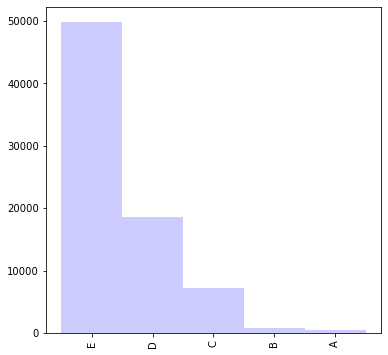

In [137]:
dist_freq_quantitativas_personalizadas['Frequencia'].plot.bar(width= 1, color= 'blue', alpha = 0.2, figsize= (6, 6))

> ### Conclusões

Vemos aqui um outlier 

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [108]:
#ok esse é o nosso dataset
#os quantitativos são: idade, anos de estudo, renda e Altura
dados.head(2)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790


C:\Users\GRAZIELLE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências - Idade KDE'}, xlabel='quantidade', ylabel='Density'>

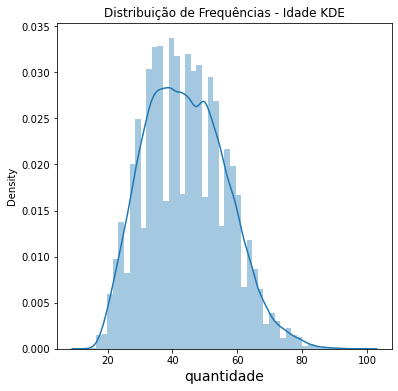

In [109]:
#esse é para IDADE
ax = sns.distplot(dados.Idade, kde = True)

ax.figure.set_size_inches(6, 6)
ax.set_title('Distribuição de Frequências - Idade KDE', fontsize=12)
ax.set_xlabel('quantidade', fontsize=14)
ax

C:\Users\GRAZIELLE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências - Anos de Estudo KDE'}, xlabel='quantidade', ylabel='Density'>

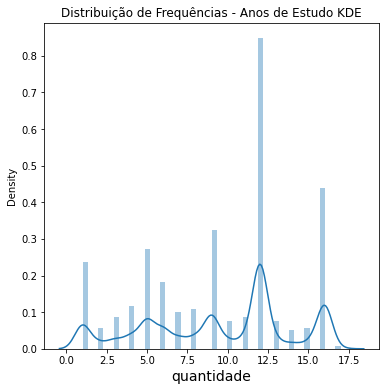

In [110]:
#anos de estudo
ax = sns.distplot(dados['Anos de Estudo'], kde = True)

ax.figure.set_size_inches(6, 6)
ax.set_title('Distribuição de Frequências - Anos de Estudo KDE', fontsize=12)
ax.set_xlabel('quantidade', fontsize=14)
ax

C:\Users\GRAZIELLE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências - Renda KDE'}, xlabel='quantidade', ylabel='Density'>

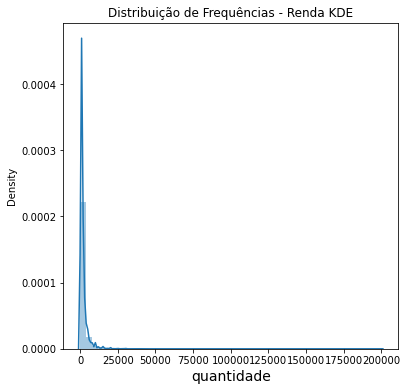

In [111]:
#esse para Renda

ax = sns.distplot(dados.Renda, kde = True)

ax.figure.set_size_inches(6, 6)
ax.set_title('Distribuição de Frequências - Renda KDE', fontsize=12)
ax.set_xlabel('quantidade', fontsize=14)
ax

C:\Users\GRAZIELLE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências - Altura KDE'}, xlabel='quantidade', ylabel='Density'>

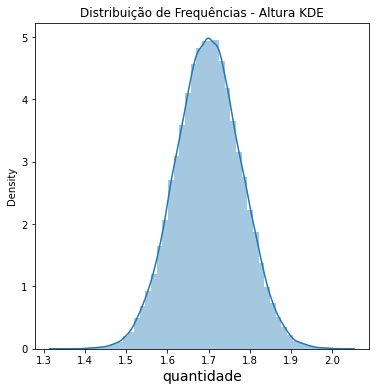

In [112]:
ax = sns.distplot(dados.Altura, kde = True)

ax.figure.set_size_inches(6, 6)
ax.set_title('Distribuição de Frequências - Altura KDE', fontsize=12)
ax.set_xlabel('quantidade', fontsize=14)
ax

> ### Conclusões - simetrias

>em relação aos anos de estudo: assimétrica à esquerda;
>em relação a Renda: assimétrica à direita (tb identificamos um outlier);
>em reção a altura: simétrica

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

C:\Users\GRAZIELLE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências - Renda KDE'}, xlabel='quantidade', ylabel='Density'>

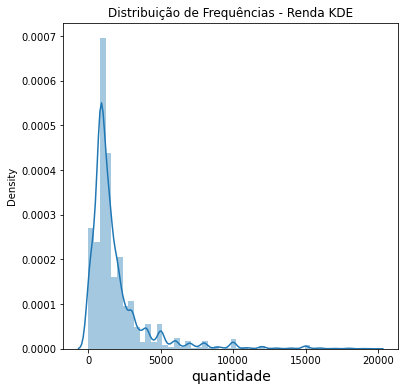

In [143]:
ax = sns.distplot(dados.query('Renda < 20000')['Renda'])

ax.figure.set_size_inches(6, 6)
ax.set_title('Distribuição de Frequências - Renda KDE', fontsize=12)
ax.set_xlabel('quantidade', fontsize=14)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [114]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [115]:
tbfrequencia = pd.crosstab(dados['Sexo'],dados['Cor'])
tbfrequencia.rename(index = sexo, inplace = True) #mudando os dados das linhas=index
tbfrequencia.rename(columns = cor, inplace = True) #mudando os dados das colunas=columns
tbfrequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [116]:
tbfrequencia_percentual = pd.crosstab(dados['Sexo'],dados['Cor'], normalize = True) * 100
tbfrequencia_percentual.rename(index = sexo, inplace = True) #mudando os dados das linhas=index
tbfrequencia_percentual.rename(columns = cor, inplace = True) #mudando os dados das colunas=columns
tbfrequencia_percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [117]:
#agora agregando RENDA + COR + SEXO

#agora criando um trabalho de agregar USANDO OUTRA variável ---------> IMPORTANTE

tbfrequencia_percentual = pd.crosstab(dados['Sexo'],dados['Cor'],aggfunc = 'mean', values = dados.Renda )
tbfrequencia_percentual.rename(index = sexo, inplace = True) #mudando os dados das linhas=index
tbfrequencia_percentual.rename(columns = cor, inplace = True) #mudando os dados das colunas=columns
tbfrequencia_percentual

# ele calcula a RENDA de acordo com a COR e o SEXO

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [118]:
dados['Renda'].mean()

2000.3831988547631

### Obtenha a mediana

In [119]:
dados['Renda'].median()

1200.0

### Obtenha a moda

In [120]:
dados['Renda'].mode()

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [121]:
desvio_medio_absoluto = dados['Renda'].mad()
desvio_medio_absoluto

1526.4951371644931

### Obtenha a variância

In [122]:
dados['Renda'].var()

11044906.00622118

### Obtenha o desvio-padrão

In [123]:
dados['Renda'].std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [150]:
tbfrequencia = pd.crosstab(dados['Cor'],dados['Sexo'], values = dados.Renda, aggfunc = {'mean','median','max'})
tbfrequencia.rename(index = cor, inplace = True) #mudando os dados das linhas=index
tbfrequencia.rename(columns = sexo, inplace = True) #mudando os dados das colunas=columns
tbfrequencia

max                   mean                 median         
Sexo     Masculino  Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                      
Indígena   10000.0  120000.0  1081.710938  2464.386139     797.5    788.0
Branca    200000.0  100000.0  2925.744435  2109.866750    1700.0   1200.0
Preta      50000.0   23000.0  1603.861687  1134.596400    1200.0    800.0
Amarela    50000.0   20000.0  4758.251064  3027.341880    2800.0   1500.0
Parda     100000.0   30000.0  1659.577425  1176.758516    1200.0    800.0

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [154]:
tbfrequencia = pd.crosstab(dados['Cor'],dados['Sexo'], values = dados.Renda.round(2), aggfunc = {'mad','var','std'})
tbfrequencia.rename(index = cor, inplace = True) #mudando os dados das linhas=index
tbfrequencia.rename(columns = sexo, inplace = True) #mudando os dados das colunas=columns
tbfrequencia

mad                       std                         var  \
Sexo        Masculino     Feminino    Masculino      Feminino     Masculino   
Cor                                                                           
Indígena   798.910889  3007.892952  1204.093490  11957.498292  1.449841e+06   
Branca    2261.012346  1670.967106  4750.791872   3251.013154  2.257002e+07   
Preta      975.602482   705.453357  1936.309271   1349.799809  3.749294e+06   
Amarela   3709.597211  2549.146322  5740.824820   3731.173660  3.295707e+07   
Parda     1125.827704   811.580946  2312.087184   1596.233048  5.345747e+06   

                        
Sexo          Feminino  
Cor                     
Indígena  1.429818e+08  
Branca    1.056909e+07  
Preta     1.821960e+06  
Amarela   1.392166e+07  
Parda     2.547960e+06

In [128]:
tbfrequencia = pd.crosstab(dados['Sexo'],dados['Cor'],aggfunc = 'var', values = dados.Renda )
tbfrequencia.rename(index = sexo, inplace = True) #mudando os dados das linhas=index
tbfrequencia.rename(columns = cor, inplace = True) #mudando os dados das colunas=columns
tbfrequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1.449841e+06,2.257002e+07,3.749294e+06,3.295707e+07,5.345747e+06
Feminino,1.429818e+08,1.056909e+07,1.821960e+06,1.392166e+07,2.547960e+06


In [129]:
tbfrequencia = pd.crosstab(dados['Sexo'],dados['Cor'],aggfunc = 'std', values = dados.Renda )
tbfrequencia.rename(index = sexo, inplace = True) #mudando os dados das linhas=index
tbfrequencia.rename(columns = cor, inplace = True) #mudando os dados das colunas=columns
tbfrequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1204.093490,4750.791872,1936.309271,5740.82482,2312.087184
Feminino,11957.498292,3251.013154,1349.799809,3731.17366,1596.233048


### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

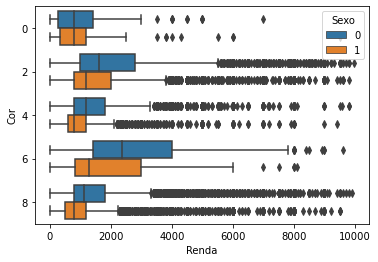

In [130]:
ax = sns.boxplot( x = 'Renda', y = 'Cor', hue = 'Sexo', data = dados.query('Renda <10000'), orient = 'h')

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [158]:
from scipy import stats
stats.percentileofscore(dados['Renda'], 788, kind = 'weak')
#padrão dessa função kind = weak / eu queria a renda menor ou igual ao 788 então o weak incluiu esse valor

28.86777719937533

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [132]:
dados.Renda.quantile([i/100 for i in range (1,100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [133]:
medidas = pd.crosstab(dados['Anos de Estudo'],dados['Sexo'],aggfunc = ['mean','median','max','std'], values = dados.Renda )
medidas

mean              median           max          \
Sexo                      0            1      0     1       0       1   
Anos de Estudo                                                          
1                799.494638   516.201748    700   390   30000   10000   
2                895.629047   492.771987    788   400   30000    2000   
3                931.178986   529.911638    788   450   40000    4000   
4               1109.203862   546.853916    800   500   80000    3500   
5               1302.329283   704.279111   1000   788   50000   10000   
6               1338.653218   781.389776   1045   788   35000    8000   
7               1448.875419   833.732824   1200   788   25000    6000   
8               1465.497940   830.751004   1200   788   40000    9000   
9               1639.396667   933.615351   1300   800   30000   18000   
10              1508.038850   868.021700   1200   788   60000   20000   
11              1731.270847   925.919225   1218   800   45000    6000   
12              2117.060504  1286.790889   1500  1000  200000  100000   
13              2470.330776  1682.313725   1800  1200   30000  120000   
14              3195.099154  1911.730047   2400  1300   25000   20000   
15              3706.620269  2226.460457   2500  1600   50000   20000   
16              6134.279790  3899.513231   4000  2800  200000  100000   
17              1295.761905   798.174419   1200   788    7000    3000   

                        std               
Sexo                      0            1  
Anos de Estudo                            
1               1023.904884   639.311534  
2               1331.950552   425.291842  
3               1435.173827   498.234168  
4               2143.800133   424.124446  
5               1419.821787   629.553397  
6               1484.650587   635.782641  
7               1476.628602   574.547028  
8               1419.708673   602.038029  
9               1515.583715   896.781213  
10              2137.664774   973.221652  
11              2078.609734   620.611907  
12              2676.538942  1819.040417  
13              2268.081538  4851.833513  
14              2797.116800  2053.789771  
15              3987.214974  2064.083336  
16              7447.613594  4212.770709  
17               979.648745   459.985964

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:title={'center':'Box-plot da RENDA por SEXO e ANOS DE ESTUDO'}, xlabel='R$', ylabel='Anos de Estudo'>

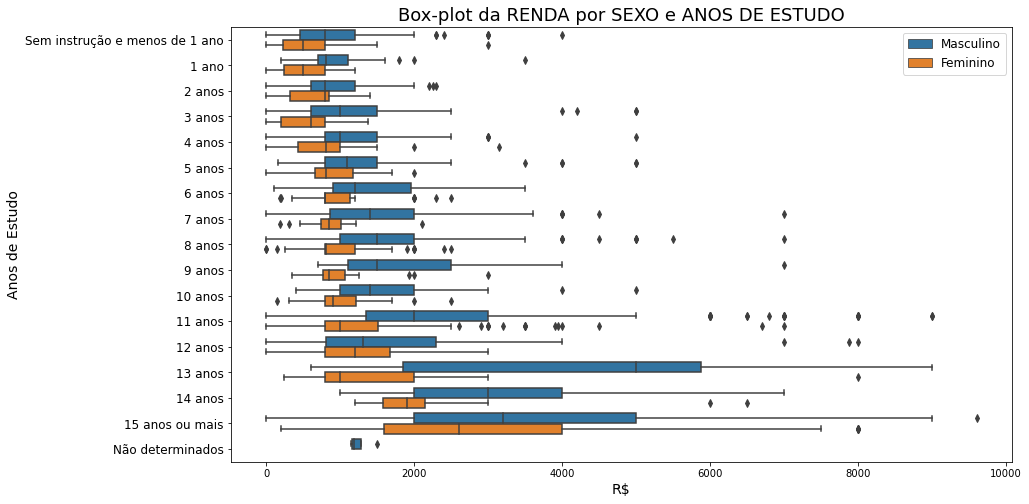

In [159]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data=dados.query('Renda < 10000 and Idade == 50'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por SEXO e ANOS DE ESTUDO', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Anos de Estudo', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [163]:
renda_estatisticas_por_uf = dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
renda_estatisticas_por_uf.rename(index = uf)
renda_estatisticas_por_uf

Renda                             
           mean  median     max          std
UF                                          
11  1789.761223  1200.0   50000  2406.161161
12  1506.091782   900.0   30000  2276.233415
13  1445.130100   900.0   22000  1757.935591
14  1783.588889  1000.0   20000  2079.659238
15  1399.076871   850.0   50000  2053.779555
16  1861.353516  1200.0   15580  2020.688632
17  1771.094946  1000.0   60000  2934.590741
21  1019.432009   700.0   30000  1887.816905
22  1074.550784   750.0   40000  2373.355726
23  1255.403692   789.0   25000  1821.963536
24  1344.721480   800.0   15500  1651.805500
25  1293.370487   788.0   30000  1950.272431
26  1527.079319   900.0   50000  2389.622497
27  1144.552602   788.0   11000  1237.856197
28  1109.111111   788.0   16000  1478.997878
29  1429.645094   800.0  200000  3507.917248
31  2056.432084  1200.0  100000  3584.721547
32  2026.383852  1274.0  100000  3513.846868
33  2496.403168  1400.0  200000  5214.583518
35  2638.104986  1600.0   80000  3503.777366
41  2493.870753  1500.0  200000  4302.937995
42  2470.854945  1800.0   80000  3137.651112
43  2315.158336  1500.0   35000  2913.335783
50  2262.604167  1500.0   42000  3031.419122
51  2130.652778  1500.0   35000  2542.630178
52  1994.580794  1500.0   30000  2221.933065
53  4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<AxesSubplot:title={'center':'Box-plot da RENDA por ESTADOS'}, xlabel='R$', ylabel='Estados'>

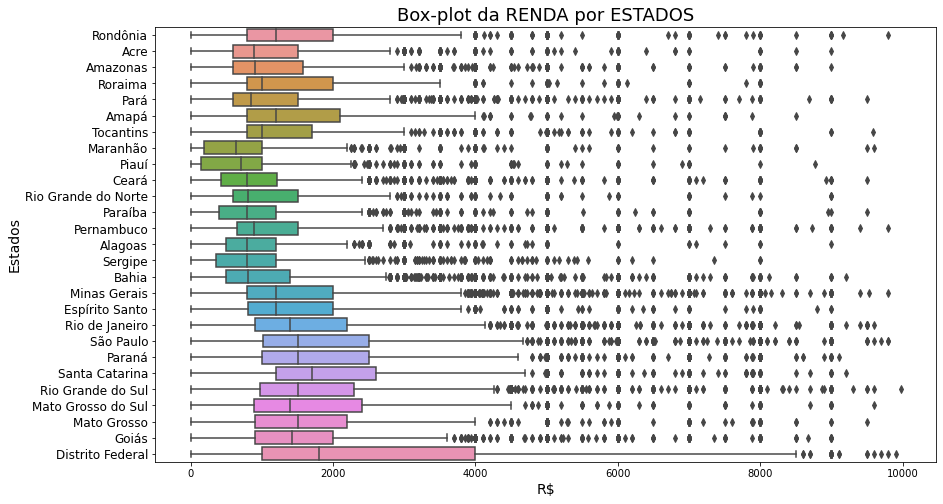

In [161]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data=dados.query('Renda < 10000'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por ESTADOS', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Estados', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels([key for key in uf.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y

ax